In [12]:
import pandas as pd
import numpy as np

In [13]:
dataset = pd.read_csv(r"clean_balanced_water_potability.csv")

In [14]:
X = dataset.iloc[:, :-1]
y = dataset.Potability.values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [16]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, 2, 3]  # class imbalance control
}

xgb = XGBClassifier(objective='binary:logistic', random_state=0, use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='f1_macro',
                    cv=5,
                    verbose=2,
                    n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\tamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:30:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Accuracy: 0.8565
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       994
           1       0.88      0.82      0.85      1006

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Confusion Matrix:
 [[886 108]
 [179 827]]


In [22]:
best_model = grid.best_estimator_
pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Accuracy: 0.8565
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       994
           1       0.88      0.82      0.85      1006

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Confusion Matrix:
 [[886 108]
 [179 827]]


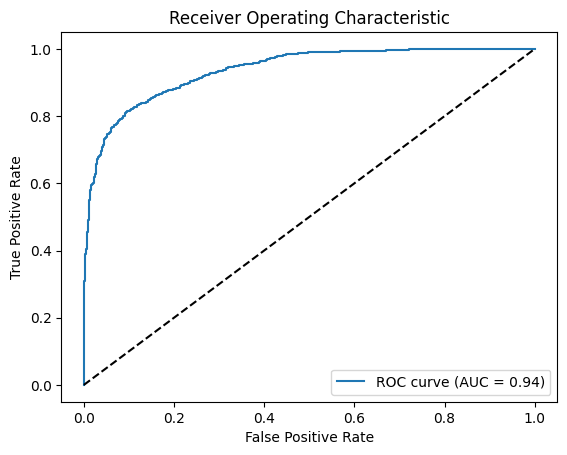

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = grid.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [23]:
import pickle

with open('Wqp_model.pkl','wb') as f:
    pickle.dump({
        'model':grid,
        'Scaler':Scaler
    },f)

In [28]:
import pickle

# Load the combined pickle file
with open("Wqp_model.pkl", "rb") as f:
    data = pickle.load(f)

loaded_model = data["model"]
loaded_scaler = data["Scaler"]

# Example usage
X_test_scaled = loaded_scaler.transform(X_test)
y_pred = loaded_model.predict(X_test_scaled)


C:\Users\tamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Keys: dict_keys(['model', 'Scaler'])

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}

Scaler Mean: [7.09241673e+00 1.96104074e+02 2.19808863e+04 7.13657484e+00
 3.32910095e+02 4.26918054e+02 1.43294911e+01 6.64235057e+01
 3.97260351e+00]
Scaler Scale: [7.11019469e-01 1.46676186e+01 3.90405700e+03 7.06898895e-01
 1.84549357e+01 3.61954066e+01 1.47365257e+00 7.18095286e+00
 3.46647859e-01]


              precision    recall  f1-score   support

           0       0.39      0.01      0.02       994
           1       0.50      0.99      0.67      1006

    accuracy                           0.50      2000
   macro avg       0.45      0.50      0.34      2000
weighted avg       0.45      0.50      0.34      2000

              precision    recall  f1-score   support

           0       0.39      0.01      0.02       994
           1       0.50      0.99      0.67      1006

    accuracy                           0.50      2000
   macro avg       0.45      0.50      0.34      2000
weighted avg       0.45      0.50      0.34      2000


Accuracy: 50.05


C:\Users\tamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\tamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
import flask
import numpy
import pandas
import sklearn
import matplotlib
import pickle
import xgboost

print("Flask:", flask.__version__)
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Scikit-learn:", sklearn.__version__)
print("Matplotlib:", matplotlib.__version__)
print("XGBoost:", xgboost.__version__)


Flask: 3.1.1
NumPy: 2.1.3
Pandas: 2.2.3
Scikit-learn: 1.6.1
Matplotlib: 3.10.3
XGBoost: 3.0.2


C:\Users\tamil\AppData\Local\Temp\ipykernel_15232\2745838412.py:8: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.2. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print("Flask:", flask.__version__)


AttributeError: module 'pickle' has no attribute '__version__'